In [2]:
from google.colab import files

uploaded = files.upload()  # Upload your ZIP file manually


Saving archive (1).zip to archive (1).zip


In [3]:
import zipfile
import os

# Replace with your uploaded zip filename
zip_filename = "archive (1).zip"
extract_path = "dataset"

# Unzip
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check contents
os.listdir(extract_path)


['train', 'test']

In [4]:
train_dir = os.path.join(extract_path, 'train')
test_dir = os.path.join(extract_path, 'test')


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, activations

# Load training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(32, 32),
    batch_size=32,
    label_mode='binary'  # Because it's real vs fake
)

# Load test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(32, 32),
    batch_size=32,
    label_mode='binary'
)

# Optional: prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


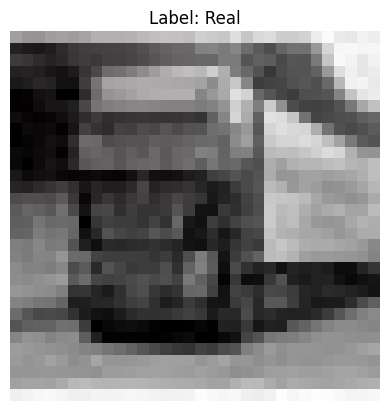

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Get a single batch of images and labels
for images, labels in train_ds.take(4):
    sample_image = images[0].numpy().astype("uint8")
    sample_label = labels[0].numpy()
    break

# Show the image
plt.imshow(sample_image)
plt.title("Label: " + ("Real" if sample_label == 0 else "Fake"))
plt.axis("off")
plt.show()


In [8]:
from tensorflow.keras import layers, models
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

model = models.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(32, 32, 3)),

    layers.Conv2D(32, 3, padding='same',activation=activations.gelu),
    layers.BatchNormalization(),

    layers.Conv2D(32, 3,padding='same', activation=activations.gelu),
    layers.BatchNormalization(),

    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same',activation=activations.gelu),
        layers.BatchNormalization(),

    layers.Conv2D(64, 3,padding='same', activation=activations.gelu),
    layers.BatchNormalization(),

    layers.MaxPooling2D(),

    layers.Conv2D(128, 3,padding='same', activation=activations.gelu),
    layers.BatchNormalization(),

    layers.Conv2D(128, 3, padding='same', activation=activations.gelu),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),


    layers.Flatten(),
    layers.Dense(128, activation=activations.gelu),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary classifier
])


In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=20,
     verbose=1
)


Epoch 1/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 78s 20ms/step - accuracy: 0.8159 - loss: 0.4205 - val_accuracy: 0.8349 - val_loss: 0.4360
Epoch 2/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 53s 17ms/step - accuracy: 0.8958 - loss: 0.2549 - val_accuracy: 0.8831 - val_loss: 0.2856
Epoch 3/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 54s 17ms/step - accuracy: 0.9125 - loss: 0.2169 - val_accuracy: 0.8921 - val_loss: 0.2722
Epoch 4/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.9226 - loss: 0.1977 - val_accuracy: 0.9120 - val_loss: 0.2322
Epoch 5/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 53s 17ms/step - accuracy: 0.9294 - loss: 0.1790 - val_accuracy: 0.9359 - val_loss: 0.1615
Epoch 6/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 53s 17ms/step - accuracy: 0.9332 - loss: 0.1683 - val_accuracy: 0.9336 - val_loss: 0.1711
Epoch 7/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 82s 17ms/step - accuracy: 0.9404 - loss: 0.1545 - val_accuracy: 0.9449 - val_loss: 0.1459
Epoch 8/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 53s 17ms/step - accuracy: 0.9437 -

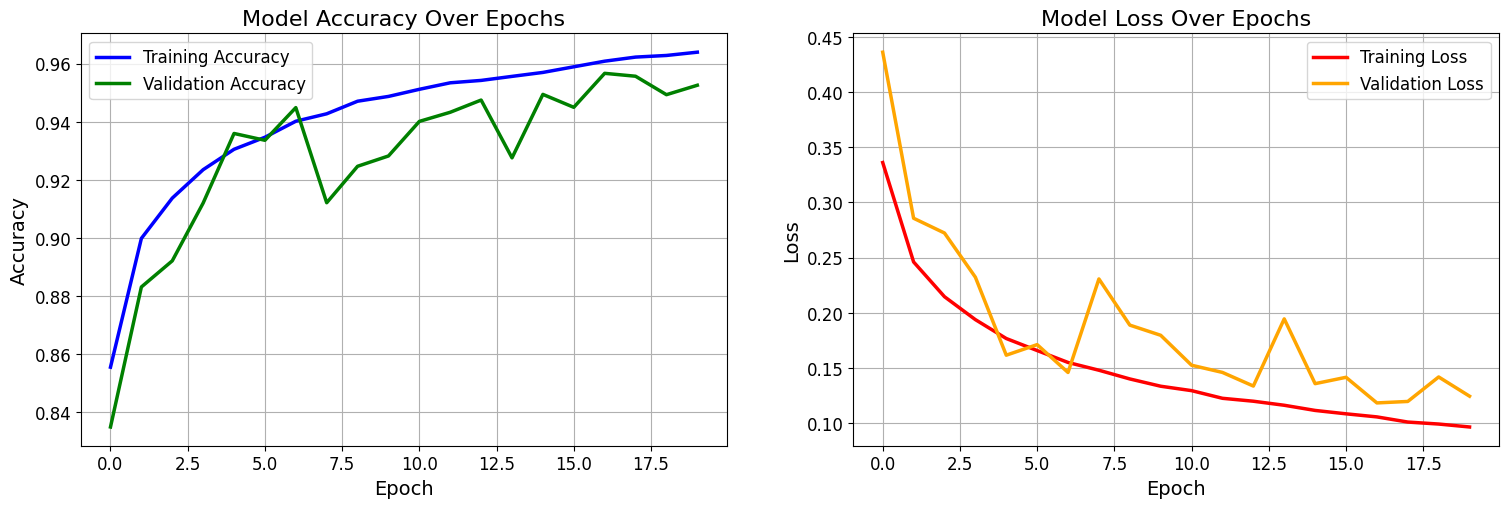

In [12]:
plt.figure(figsize=(16, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2.5)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green', linewidth=2.5)
plt.title('Model Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='red', linewidth=2.5)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2.5)
plt.title('Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Improve spacing
plt.tight_layout(pad=4.0)
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
# Get true labels and predicted labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)

    # For binary classification with sigmoid:
    preds = (preds > 0.5).astype("int32").flatten()

    y_pred.extend(preds)
    y_true.extend(labels.numpy().astype("int32"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━

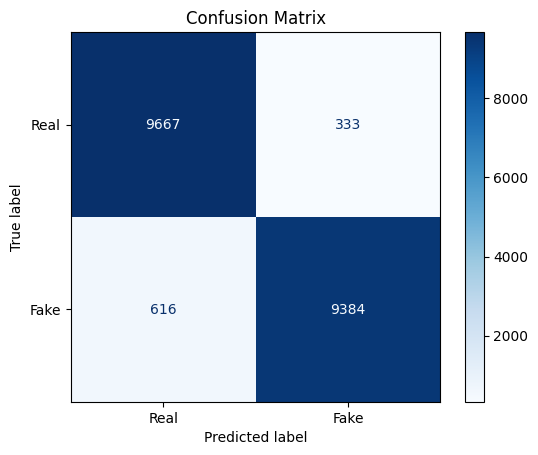

In [14]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [15]:
print(classification_report(y_true, y_pred, target_names=['Real', 'Fake']))

              precision    recall  f1-score   support

        Real       0.94      0.97      0.95     10000
        Fake       0.97      0.94      0.95     10000

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000

